# CYCLISTIC BIKE SHARE CASE STUDY
<i>How does a bike-share navigate speedy success?</i>

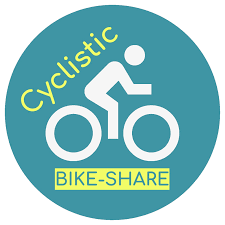

In [56]:
from IPython.display import Image
from IPython.core.display import HTML 

Image("Images/Logo.png")

### ABOUT THE COMPANY
<p>Founded in 2016, Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. In addition to offering traditional bikes, the company also has reclining bikes, hand tricycles, and cargo bikes included in its renting options. They can be unlocked from one station and returned to any other station in the system anytime.</p>

<p>Cyclistic has flexible pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders while customers who purchase annual memberships are known as members.</p>

<p>The company's finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps the company attract more customers, Lily Moreno – Cyclistic's marketing director – believes that maximizing the number of annual members will be key to future growth. Instead of creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.</p>

### BUSINESS TASK
<p><li>Analyzing the company’s historical bike trip data to identify trends into how annual members and casual riders use Cyclistic bikes differently.</li></p>

### STAKEHOLDERS
<p><li><b>Lily Moreno</b> – Cyclistic’s marketing director.</li></p>

<p><li><b>Cyclistic marketing analytics team</b> – A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide the company’s marketing strategy.</li></p>

<p><li><b>Cyclistic executive team</b> – Responsible for deciding whether to approve the recommended marketing program.</li></p>

## 1. ASK
<p><li>How do annual members and casual riders use Cyclistic bikes differently?</li></p>

## 2. PREPARE
<p>The data used in this project has been made available by Motivate International Inc. under this <a href="https://ride.divvybikes.com/data-license-agreement" title=”license”>license</a>.The datasets are named differently because Cyclistic is a fictional company. Divvy, the name you will see on the files, is a real bike-share system in Chicago with over 600 stations and 6,000+ bikes across the city. For this reason, the data is quite appropriate and will help us explore how different customer types are using Cyclistic's bikes.</p>

<p>It is important to note, however, that data-privacy issues prohibit us to have access to the users' personal information, meaning we will not be able to connect pass purchases to credit card numbers in order to determine if casual riders live in the Cyclistic service area, or if they have purchased multiple single passes. You can check the datasets <a href="https://divvy-tripdata.s3.amazonaws.com/index.html" title=”here”>here</a>.</p>

<p>We will be working with 12 CSV files, comprehending the datasets between ‘202104-divvy-tripdata’ and ‘202203-divvy-tripdata’. This data corresponds to the period between April 2021 and Mar 2022. On those files, we will find the types of bikes available for rental, the date and time of each bike rental and its return to the station, the different station names, and more. Considering our data limitations, we will not be able to find out whether a casual rider spends more money per year than they would on an annual membership, their gender, age, or neighborhood - but we can still use this dataset to explore trends and learn how casual riders and members differ in their bike rental habits.</p>

## 3. PROCESS
<p>Load all the libraries and datasets. Then, going onwards will be performing data exploration by getting an overview of the datasets, checking the data types, and cleaning the data.</p>

### Loading Libraries

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter

import datetime

from pandas.api.types import CategoricalDtype

import seaborn as sns

### Loading Datasets

In [3]:
april_2021_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202104-divvy-tripdata.csv')
may_2021_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202105-divvy-tripdata.csv')
june_2021_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202106-divvy-tripdata.csv')
july_2021_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202107-divvy-tripdata.csv')
aug_2021_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202108-divvy-tripdata.csv')
sep_2021_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202109-divvy-tripdata.csv')
oct_2021_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202110-divvy-tripdata.csv')
nov_2021_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202111-divvy-tripdata.csv')
dec_2021_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202112-divvy-tripdata.csv')
jan_2022_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202201-divvy-tripdata.csv')
feb_2022_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202202-divvy-tripdata.csv')
mar_2022_tripdata = pd.read_csv(r'/Users/jessica/Desktop/Cyclistic-Bike/Data/202203-divvy-tripdata.csv')

### Data Exploration

#### Getting an overview of the data
<p>Taking a first look at couple of the datasets.</p>

In [4]:
april_2021_tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [5]:
jan_2022_tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


> **Note:** As shown above, the datasets contain the same columns. Since <b>there are 12 datasets, we should combine them into only one.</b> This will make it alot easier to clean the data, make any transformations, and perform analysis. 
> In order to do this, we will use the <b>concat()</b> function, think of it as Python's version of a SQL UNION.

#### Combining all of the datasets into one with concat()

In [6]:
trip_data = pd.concat([
                        april_2021_tripdata,
                        may_2021_tripdata,
                        june_2021_tripdata,
                        july_2021_tripdata,
                        aug_2021_tripdata,
                        sep_2021_tripdata,
                        oct_2021_tripdata,
                        nov_2021_tripdata,
                        dec_2021_tripdata,
                        jan_2022_tripdata,
                        feb_2022_tripdata,
                        mar_2022_tripdata
                      ])

#### Checking the data types in the dataset
<p>Checking the data types to get an idea with what I will be working with.</p>

In [7]:
trip_data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

#### Taking a closer look at the dataset
<p>The next step involves learning more about some of our dataset's characteristics, so we can understand its content better.</p>

##### How many unique rides are there in total?

In [9]:
trip_data.ride_id.nunique()

5723532

##### How many types of bikes are there?

In [10]:
trip_data.rideable_type.nunique()

3

##### How many rows and columns are there in the dataframe?

In [11]:
trip_data.shape

(5723532, 13)

### Cleaning Data
<p>Now, it is time to make sure that the data is clean and tidy before conducting analysis.</p>

#### Checking for empty cells

In [12]:
trip_data.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

> **Note:** There are null values in our dataset. Next let's see how many of them are we dealing with?

In [13]:
trip_data.isnull().values.sum()

3092675

> **Note:** As shown above, there are null values in the following columns : <i>start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng</i>.
> <p>Given that going onwards I will not be using these columns mentioned above for the analysis, so there is no concern about removing the null values, hence; going to drop the columns altogether.</p>

#### Dropping Unnnecessary Columns

In [22]:
to_drop = [
            'start_station_name',
            'start_station_id',
            'end_station_name',
            'end_station_id',
            'start_lat',
            'start_lng',
            'end_lat',
            'end_lng'
          ]

trip_data.drop(to_drop, inplace=True, axis=1)

In [23]:
trip_data.dtypes

ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

In [24]:
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,casual


#### Looking for duplicate values

In [25]:
trip_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284037    False
284038    False
284039    False
284040    False
284041    False
Length: 5723532, dtype: bool

> **Note:** No duplicate rows found.

## 4. ANALYZE
<p>Now, I will perform data transformation and change data formatting to perform analysis.</p>

### Data Tranformation
<p>In this step, I will transform certain aspects of the data in order to analyze them.</p>

#### Changing data formatting
<p>When using dtypes, note that some of the columns are of type object. These columns need to be changed to the data type from columns started_at and ended_at to datetime to perform certain calculations.</p>

In [26]:
trip_data['started_at'] = pd.to_datetime(trip_data['started_at'])

trip_data['ended_at'] = pd.to_datetime(trip_data['ended_at'])

#### Creating an hour column

In [28]:
trip_data['hour'] = trip_data['started_at'].dt.hour

trip_data = trip_data.astype({'hour' : 'int8'})

#### Creating a day of the week column

In [29]:
trip_data['dayofweek'] = trip_data['started_at'].dt.day_name()

#### Creating a month column

In [30]:
trip_data['month'] = trip_data['started_at'].dt.month_name()

#### Creating a ride length column

In [31]:
trip_data['ride_length'] = (trip_data['ended_at'] - trip_data['started_at']) / datetime.timedelta(minutes=1)

trip_data['ride_length'] = trip_data['ride_length'].astype('int32')

#### Removing Outliers
<p>Now, I will check for any rows with zero or negative values in ride_length column and remove them.</p>

In [32]:
trip_data[ trip_data['ride_length'] <= 0].count()

ride_id          89375
rideable_type    89375
started_at       89375
ended_at         89375
member_casual    89375
hour             89375
dayofweek        89375
month            89375
ride_length      89375
dtype: int64

In [33]:
# removing rows with zero or negative values
trip_data = trip_data.drop(trip_data[trip_data.ride_length <= 0].index)

In [34]:
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,dayofweek,month,ride_length
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,member,18,Monday,April,31
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,casual,17,Tuesday,April,64
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,casual,12,Saturday,April,5697
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,member,9,Saturday,April,25
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,casual,12,Saturday,April,91


### Trip Data
<p>Take a close look at more specific information surrounding the dataframe. Since the business task is to find out how casual riders and members are using Cyclistic bikes differently, going to filter the data and create some pivot tables to compare the numbers from the two types of columns.</p>

#### Rides by customer type

In [36]:
ride_by_customer_type = trip_data.groupby('member_casual', as_index=True)[['ride_id']].count()
ride_by_customer_type

,ride_id
member_casual,
casual,2254755
member,2779130


#### Average ride length

In [38]:
avg_ride_length = trip_data.groupby('member_casual', as_index=True)[['ride_length']].mean() 
avg_ride_length

,ride_length
member_casual,
casual,31.701661
member,13.130528


#### The most popular rideable type

In [39]:
rt_pivot = pd.pivot_table(trip_data, index=['rideable_type', 'member_casual'], values='ride_id', 
                          aggfunc=['count'],margins=True, margins_name='total count')
rt_pivot

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1117481
              member         1743648
docked_bike   casual          270290
electric_bike casual          866984
              member         1035482
total count                  5033885

#### The most popular day of the week for bike rentals

In [40]:
pdw_pivot = pd.pivot_table(trip_data, index=['dayofweek', 'member_casual'], values='ride_id', 
                          aggfunc=['count'],margins=True, margins_name='total count')
pdw_pivot

count
                           ride_id
dayofweek   member_casual         
Friday      casual          322980
            member          396158
Monday      casual          258779
            member          383490
Saturday    casual          487375
            member          377868
Sunday      casual          427227
            member          339389
Thursday    casual          260274
            member          416080
Tuesday     casual          244582
            member          428673
Wednesday   casual          253538
            member          437472
total count                5033885

#### The most popular month for bike rentals

In [41]:
pm_pivot = pd.pivot_table(trip_data, index=['month', 'member_casual'], values='ride_id', 
                          aggfunc=['count'],margins=True, margins_name='total count')
pm_pivot

count
                           ride_id
month       member_casual         
April       casual          117209
            member          171767
August      casual          369075
            member          351604
December    casual           59040
            member          150139
February    casual           17410
            member           76655
January     casual           15016
            member           69310
July        casual          398667
            member          339152
June        casual          330675
            member          318942
March       casual           76647
            member          164695
May         casual          225783
            member          240162
November    casual           92398
            member          216891
October     casual          227503
            member          330873
September   casual          325332
            member          348940
total count                5033885

#### The average ride length by the day of the week

In [43]:
rpw_pivot = pd.pivot_table(trip_data, index=['dayofweek', 'member_casual'], values='ride_length', 
                          aggfunc=['mean'],margins=True, margins_name='total ride_length mean')
rpw_pivot

mean
                                     ride_length
dayofweek              member_casual            
Friday                 casual          30.335720
                       member          12.897266
Monday                 casual          31.462178
                       member          12.717466
Saturday               casual          34.193541
                       member          14.813109
Sunday                 casual          37.478612
                       member          15.145217
Thursday               casual          27.869610
                       member          12.309515
Tuesday                casual          27.359450
                       member          12.241319
Wednesday              casual          27.284194
                       member          12.339718
total ride_length mean                 21.448826

#### The average ride length by month

In [44]:
rpm_pivot = pd.pivot_table(trip_data, index=['month', 'member_casual'], values='ride_length', 
                          aggfunc=['mean'],margins=True, margins_name='total ride_length mean')
rpm_pivot

mean
                                     ride_length
month                  member_casual            
April                  casual          38.059526
                       member          14.419953
August                 casual          28.683902
                       member          13.818489
December               casual          23.018056
                       member          10.664584
February               casual          26.241528
                       member          11.112543
January                casual          28.380261
                       member          11.741625
July                   casual          32.929753
                       member          14.005865
June                   casual          37.190834
                       member          14.465038
March                  casual          32.733401
                       member          11.706828
May                    casual          37.719284
                       member          14.409469
November               casual          23.330851
                       member          11.017373
October                casual          28.996022
                       member          12.237508
September              casual          27.621808
                       member          13.464214
total ride_length mean                 21.448826

#### Total number of rides per hour

In [45]:
tnr_pivot = pd.pivot_table(trip_data, index=['hour', 'member_casual'], values='ride_id', 
                          aggfunc=['count'],margins=True, margins_name='total ride_id count')
tnr_pivot

count
                                   ride_id
hour                member_casual         
0                   casual           47903
                    member           29950
1                   casual           35009
                    member           19832
2                   casual           23111
                    member           11438
3                   casual           12726
                    member            6663
4                   casual            8818
                    member            7521
5                   casual           11339
                    member           27838
6                   casual           23459
                    member           73782
7                   casual           42603
                    member          138232
8                   casual           57971
                    member          161494
9                   casual           68250
                    member          119486
10                  casual           93121
                    member          115963
11                  casual          120397
                    member          138964
12                  casual          143483
                    member          161683
13                  casual          153012
                    member          158248
14                  casual          157856
                    member          155698
15                  casual          167409
                    member          180710
16                  casual          182738
                    member          234422
17                  casual          210791
                    member          291391
18                  casual          191553
                    member          245419
19                  casual          148961
                    member          175915
20                  casual          109132
                    member          119605
21                  casual           92938
                    member           89645
22                  casual           85967
                    member           68316
23                  casual           66208
                    member           46915
total ride_id count                5033885

## 5. SHARE
<p>Now I will visualize the information discovered through our analysis.</p>

#### Visualizing rides by user type

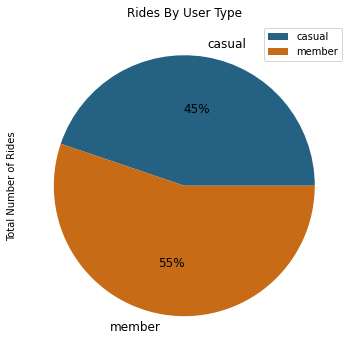

In [47]:
ride_by_customer_type['ride_id'].plot.pie(x='member_casual', ylabel='Total Number of Rides', 
                                   title='Rides By User Type', legend=True,
                                   autopct='%1.0f%%', fontsize='12', startangle=0, 
                                   colors=['#246182', '#c76b16'], figsize=(12, 6))
plt.legend(loc="upper right")
plt.savefig('Images/Rides_By_User_Type.png', facecolor='white')
plt.show()

> **Note:** The above pie chart shows us that <b>annual members represent the majority of Cyclistic-Bike Sharing system users</b>, making up to <b>55%</b> of total users.

#### Visualizing average ride length by user type

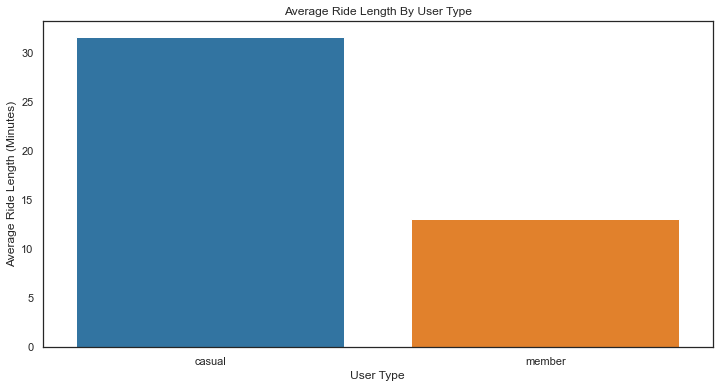

In [49]:
avg_ride_lgth_user_type = trip_data[['ride_length', 'member_casual']]
avg_ride_lgth_user_type = avg_ride_lgth_user_type.groupby(['member_casual'], as_index=False)[['ride_length']].mean()

plt.figure(figsize=(12,6))
sns.set_theme(style='white')
sns.barplot(data=avg_ride_lgth_user_type,
            x='member_casual',
            y='ride_length',
            palette='tab10').set_title('Average Ride Length By User Type')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.savefig('Images/Avg_Ride_Length_User_Type.png', facecolor='white')
plt.show()

> **Note:** The bar char above shows that <b>casual riders have much greater ride length on average than members.</b> The average ride length is <b>32 mins for casual riders</b> and <b>13 mins for members</b>.

#### Visualizing the most popular rideable type

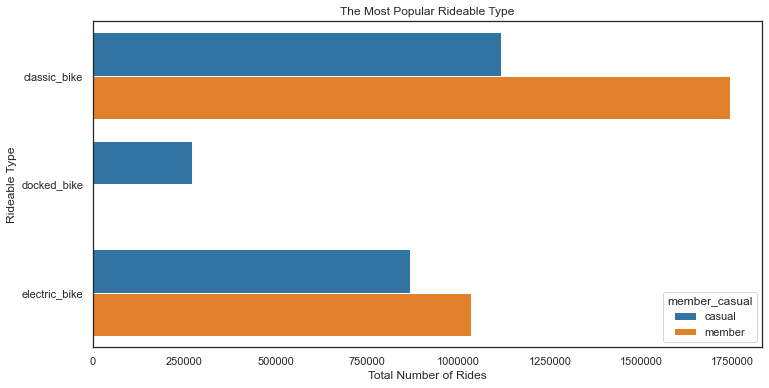

In [50]:
prt_df = trip_data[['rideable_type', 'member_casual', 'ride_id']]
prt_df = prt_df.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize=(12,6))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(data=prt_df,
            x='ride_id',
            y='rideable_type',
            hue='member_casual',
            palette='tab10').set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type')
plt.savefig('Images/Popular_Rideable_Type.png', facecolor='white')
plt.show()

> **Note:** According to the dataset, Cyclistic's Bikes are divided into three groups : <i> classic bike, docked bike,</i> and <i>electric bike</i>. It is clear from the visaulization above that <b>classic bike is most rented rideable type by both casual riders and members</b>. This could either be explained by the users showing a preference for the classic bike or, more, plausibly, the company has invested more heavily in a classic bike based system than the other two options.

#### Visualizing the most popular day of the week for bike rentals

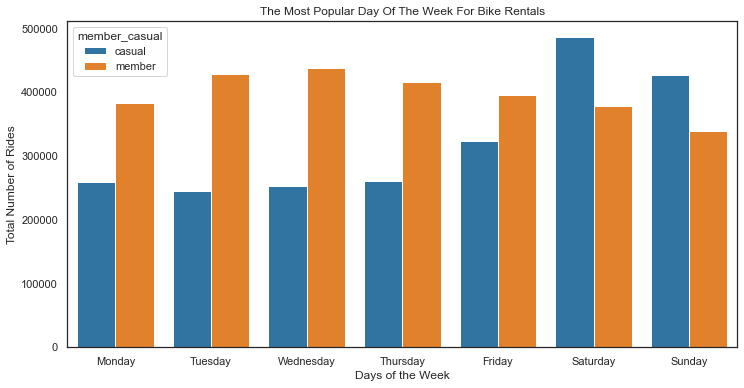

In [51]:
prw_df = trip_data[['dayofweek', 'member_casual', 'ride_id']]
prw_df = prw_df.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (12,6))
sns.set_theme(style='white')
sns.barplot(data=prw_df, x='dayofweek', y='ride_id', hue='member_casual', palette='tab10',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'Sunday']).set_title('The Most Popular Day Of The Week For Bike Rentals')

plt.xlabel('Days of the Week')
plt.ylabel('Total Number of Rides')
plt.savefig('Images/Popular_Day_For_Bike_Rentals.png', facecolor='white')
plt.show()

> **Note:** When it comes to bike rentals by day of the week, there are differences between casual riders and members. For instance, <b>Saturday is most popular day for casual riders</b>, and <b>Wednesday is most popular day for members</b>. The two groups differ considerably when it comes to bike rentals throughout the weekdays : <b>members consistently rent bikes on daily basis while casual riders present lower weekday numbers compared to the weekend</b>.

#### Visualizing the most popular month of the year for bike rentals

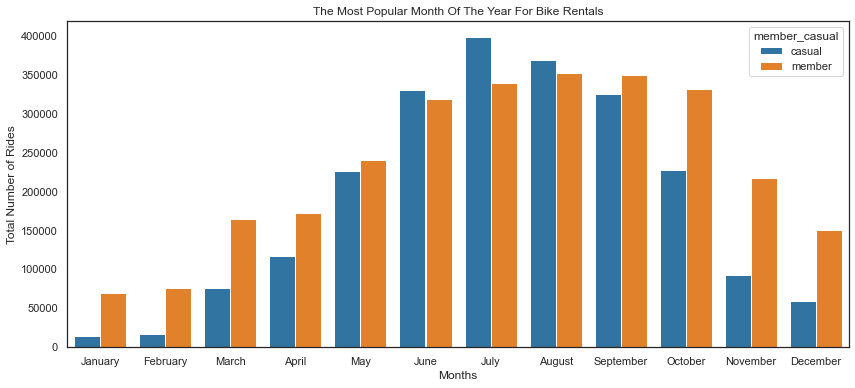

In [52]:
prm_df = trip_data[['month', 'member_casual', 'ride_id']]
prm_df = prm_df .groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (14,6))
sns.set_theme(style='white')
sns.barplot(data=prm_df, x='month', y='ride_id', hue='member_casual', palette='tab10', 
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                   'October', 'November', 'December']).set_title('The Most Popular Month Of The Year For Bike Rentals'),

plt.xlabel('Months')
plt.ylabel('Total Number of Rides')
plt.savefig('Images/Popular_Month_Of_The_Year_For_Bike_Rentals.png', facecolor='white')
plt.show()

> **Note:** Visualizing the number of rides can be helpful to recognize if seasonality plays a role in bike rental. The bar chart above shows us that <b>the number of rentals increases during summer months</b> and gradually drops over the fall and winter for both user types. The main difference is that members are still more consistent with their rental habits throughout the year when compared to casual riders, whose numbers drop significantly during the winter months.

#### Visualizing average ride length by day of the week 

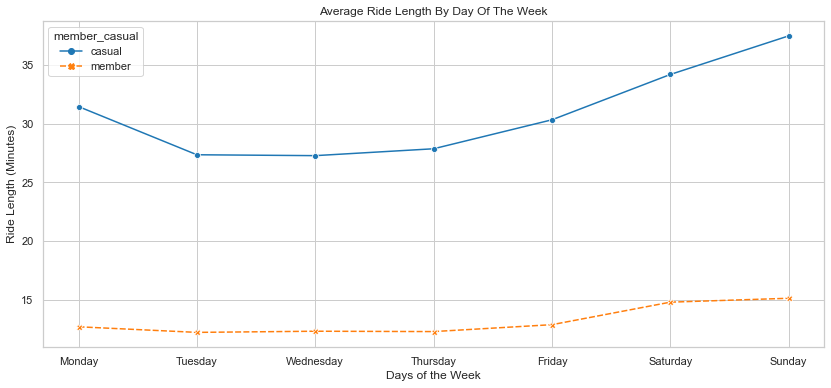

In [53]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
trip_data['dayofweek'] = trip_data['dayofweek'].astype(cat_type)
avg_ride_length_dofw = trip_data.copy()

avg_ride_length_dofw = trip_data[['dayofweek', 'member_casual', 'ride_length']]
avg_ride_length_dofw = avg_ride_length_dofw.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=avg_ride_length_dofw, x='dayofweek', y='ride_length', hue='member_casual', 
             style='member_casual', palette='tab10', 
             markers=True).set_title('Average Ride Length By Day Of The Week')

plt.xlabel('Days of the Week')
plt.ylabel('Ride Length (Minutes)')
plt.savefig('Images/Avg_Ride_Length_DOFW.png', facecolor='white')
plt.show()

> **Note:** On this plot, it becomes clear that <b>ride length increases on the weekends</b> for both the groups. The difference between casual riders and members in this scenario lies in the duration of rides. <b>Casual riders tend to take longer rides, longest one being of 37 mins</b>. In contrast, <b>members present much shorter rides that last max of 15 mins</b>.<p> Considering the lack of personal user data for privacy reasons, it is difficult to determine exactly what causes casual riders and members to have such different riding lengths. It is likely that members live close to work/school and choose to commute using Cyclistic's Bike Sharing System. As for the casual riders, taking into consideration that they purchase either single-ride or full-day passes, this makes them less likely to use the service on daily basis as members do. Casual riders could have longer ride lengths because they're using it for leisure or tourism. Regardless, it is difficult to answer this question with certainity why ride length increases on the weekends for both groups given the gaps in the data.</p>

#### Visualizing average ride length by month of the year

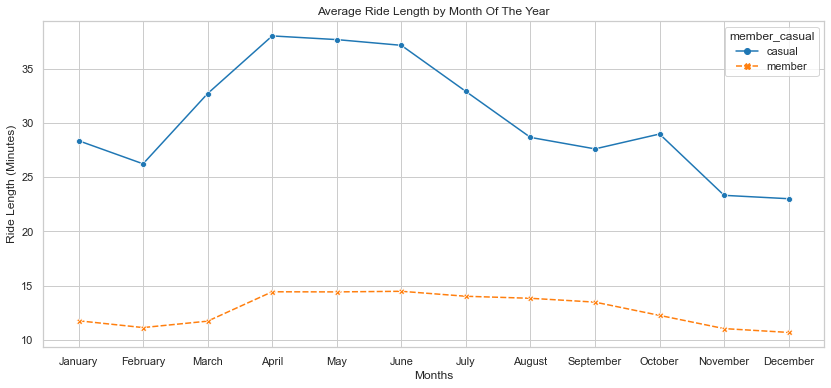

In [54]:
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
trip_data['month'] = trip_data['month'].astype(cat_type)
avg_ride_length_moy = trip_data.copy()

avg_ride_length_moy = trip_data[['month', 'member_casual', 'ride_length']]
avg_ride_length_moy = avg_ride_length_moy.groupby(['month', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=avg_ride_length_moy, x='month', y='ride_length', hue='member_casual', palette='tab10', 
             style='member_casual', markers=True).set_title('Average Ride Length by Month Of The Year')

plt.xlabel('Months')
plt.ylabel('Ride Length (Minutes)')
plt.savefig('Images/Avg_Ride_Length_MOY.png', facecolor='white')
plt.show()

> **Note:** Visualizing ride length by month of the year can help in recognizing user's riding habots throughout the year. Note that the ride length changes considerably for casual riders as the months go by. For this type of customer, <b>the ride length peaks during summer, reaching an average of 38 mins in April</b> - before dropping in May. <b>As for the members, the ride length does not change drastically over the months, peaking in April - averaging 14 mins</b> and then gradually dropping after June for the remainder of the year.<p>Considering the short trips, this could indicate that members use Cyclistic's bikes to commute, and perhaps, run errands. The drop in ride length over the winter months could indicate that members choose other means of transportation to commute during that time of the year. In contrast, casual riders could be using it for leisure or tourism - as mentioned earlier - especially during the spring and summer.</p>

#### Visualizing the total number of rides per hour

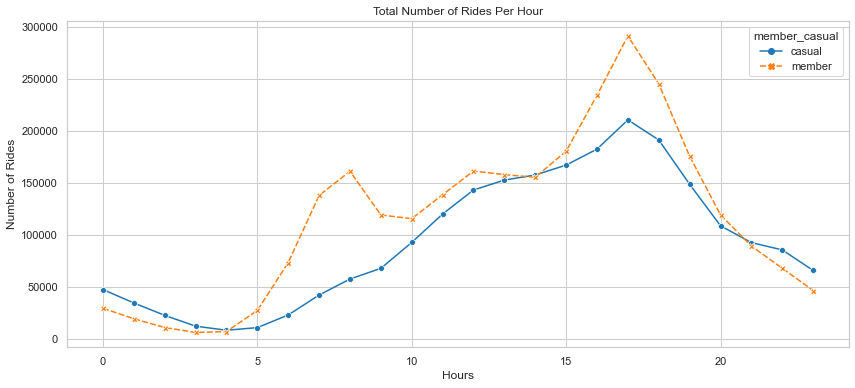

In [55]:
total_num_rides_per_hour = trip_data[['hour', 'member_casual', 'ride_id']]
total_num_rides_per_hour = total_num_rides_per_hour.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=total_num_rides_per_hour, x='hour', y='ride_id', hue='member_casual', palette='tab10',
             style='member_casual', markers=True).set_title('Total Number of Rides Per Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.savefig('Images/Total_Num_Rides_Per_Hour.png', facecolor='white')
plt.show()

> **Note:** By taking a closer look into the total num of rides per hour can help in finding more patterns in the customer's bike rental habits. The <b>num of bike rentals by casual riders begins to increase between 8:00 a.m. and 10:00 a.m., peaking at 5 p.m. As for the members, the numbers start to go up earlier - between 6 a.m. and 7 a.m. also peaking at 5:00 p.m.</b> Notice that the num of rides by members is far greater than casual riders. This could be related to the fact that members represent the majority of users and likely use Cyclistic's services for their daily commute.

## 6. ACT
<p>Now, it is time to summarize key trends and present recommendations for Cyclistic's marketing team.</p>

### Key Findings
<p><li>Annual members are the majority of users, making up for 55% of Cyclistic's customer.</li></p>
<p><li>Casual riders have an average of 32 mins while members take shorter trips, averaging 13 mins.</li></p>
<p><li>Classic bike is the most popular rideable type for both the groups, followed by electric and docked bike, respectively.</li></p>
<p><li>Saturday is the most popular day of the week for bike rentals for casual riders. In contrast, Wednesday is most popular day of the week for bike rentals for the members.</li></p>
<p><li>Members consistently rent bikes on daily basis while casual riders present lower weekday numbers compared to the weekend.</li></p>
<p><li>July is the most popular month of the year for bike rental, hence, there is clear rise in numbers during the summer for both casual riders and members.</li></p>
<p><li>Both user types take longer rides during spring and summer months.</li></p>
<p><li>The num of bike rentals by casual riders begins to increase between 8:00 a.m. and 10:00 a.m., peaking at 5 p.m. As for the members, the numbers start to go up earlier - between 6 a.m. and 7 a.m. also peaking at 5:00 p.m.</li></p>
<p><li>Average ride length combined with the average time of the day rentals indicates that members use Cyclistic's bikes to go to work/school. The noticeable drop in ride length over the winter could be related to a change in means of transportation to commute during that time of the year.</li></p>
<p><li>Casual riders' bike rental numbers on the weekends paired with average ride length during the summer suggest that they are using the single-ride and full-day passes for leisure or tourism.</li></p>

#### After conducting analysis with support of visualization, it becomes clear how casual riders and members use Cyclistic's bikes differently 
<p><li><b>Casual Rider</b> tend to rent more bikes on the weekends - especially over the summer. Considering long average ride lengths, this combination of factors suggest that this group of customers use the bikes for leisure.</li></p>
<p><li><b>Members</b> tend to use Cyclistic's bike sharing system on a daily basis for shorter rides, indicating its use for commuting to work/school and running errands on the weekends.</li></p>

### Recommendations 
<p><li>Increase marketing campaign targeted at casual riders through emails, text messages, and app notifications during summer months, when bike rental is more frequent. The ads could offer special discounts for the annual membership in order to encourage casual riders to make the switch.</li></p>

<p><li>Create reward points for members, where each bike rental adds up a certain number of points to the user’s account. The points could get higher with rental frequency and trip duration, and at the end of each year, the user could exchange the points for a discount on membership renewal.</li></p>

<p><li>Cyclistic could study partnering up with local companies and offer special deals on places such as fitness centers, movie theaters, beauty salons, and restaurants. Focusing on entertainment and wellness segments could motivate casual riders into signing up for the annual membership.</li></p>

<p><li>Since casual riders do not rent bikes as much as members during the weekdays, Cyclistic’s marketing team should also consider the possibility of creating two new types of membership :</li></p>

<p><ul><li>An annual membership that only includes the weekends. This way, the customers that only rent bikes twice a week could pay accordingly and still add to the company’s growing number of members.</li>
<li>A seasonal membership tailored for the group of people that likes to ride bikes during the summer, but do not have any interest in renting it for the remainder of the year. This type of membership could be billed annually, and offer a special discount in comparison to the single-ride and full-day passes.</li></ul></p>

#### Additional Considerations & Future Improvements
<p>Given the fact that there were certain gaps in discovered in the data, such as the lack of payment, age, gender, and geographical information, it is difficult to make further recommendations. Demographic data plays a significant role in creating a successful marketing campaign because it allows businesses to understand their audience better. Once the company has this information, they can segment their customers into separate groups based on their habits, interests, and other important characteristics. This way, the marketing team is able to create customized ad campaigns capable of achieving Cyclistic’s marketing and financial goals.</p>